In [3]:
import pandas as pd
import numpy as np
import os,sys
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('C:/Users/Srijan-DS/Documents/Projects/identify-important-customers/data/raw/train_df.csv')
df.head()

,id,purchase_amount,asset_amount,average_ratio,personal_id_1,personal_id_2,age,area,job_type,phone,personal_card_1,personal_card_2,personal_card_3,personal_card_4,car,purchase_score,campaign_use,card_expired,average_favorite_score,card_history_period,score_1,score_2,score_3,score_4,total_amount_1,total_amount_2,total_amount_3,important_customer
0,0,62978.0,64016,87.170255,1256,86,44,NaN,Salaried,1,1,NaN,0,1.0,0,0,0.0,0.0,0.010922,0.048340,0,7,0,0.0,58620,10590,1392,0
1,1,66790.0,64497,83.609102,666,86,30,5318.0,Salaried,1,0,0.0,1,0.0,0,705,0.0,0.0,1.687598,1.701259,0,0,6,0.0,70809,9575,889,0
2,2,57788.0,111404,58.986180,1621,120,36,5954.0,Self employed,1,1,0.0,0,NaN,0,309,2.0,1.0,0.001265,3.483625,0,9,6,0.0,55294,38319,779,0
3,3,59729.0,63983,72.702121,1731,51,27,7263.0,NaN,1,0,0.0,0,0.0,0,740,0.0,0.0,0.015441,3.338835,0,1,2,0.0,1972,9314,2081,0
4,4,50533.0,98623,82.218856,801,86,40,6270.0,NaN,1,1,0.0,0,0.0,0,3,0.0,0.0,0.001283,0.067355,0,2,0,0.0,4942,10484,1772,0


In [1]:
import pandas as pd
import numpy as np
import os,sys
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('C:/Users/Srijan-DS/Documents/Projects/identify-important-customers/data/raw/train_df.csv')

df.drop(['id'],axis=1,inplace=True)

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df,test_size=0.2,random_state=42)

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import VarianceThreshold

transformer_1 = ColumnTransformer(
    transformers = [('tnf1', SimpleImputer(strategy='mean'), [0]),
                    ('tnf2', SimpleImputer(strategy='median'), [6]),
                    ('tnf3', SimpleImputer(strategy='most_frequent'), [7,10,12,15,16,22])
                    ],
     remainder = 'passthrough'
).set_output(transform='pandas')

transformer_2 = ColumnTransformer(
    transformers = [('trf4', OneHotEncoder(sparse=False,drop='first'),[2])],
    remainder = 'passthrough'
).set_output(transform='pandas')

'''transformer_3 = ColumnTransformer(
    transformers = [('trf5', RobustScaler(),[1,8,9,11,18,19,23,24,25]),
                   ('trf6', MinMaxScaler(),[0,2,3,4,5,6,7,10,12,13,14,15,16,17,20,21,22])
                   ],
    remainder = 'passthrough'
).set_output(transform='pandas')

transformer_4 = ColumnTransformer(
    transformers = [('trf6', VarianceThreshold(threshold=0.05),[i for i in range(df.shape[1])])],
    remainder = 'passthrough'
).set_output(transform='pandas')'''

pipe = Pipeline(
    [
        ('transformer_1', transformer_1),
        ('transformer_2', transformer_2)
    ]
)

df_train = pipe.fit_transform(df_train)

extracted_names = [col.split('__')[-1] for col in df_train.columns]

df_train.columns = extracted_names
df_train.head()

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['important_customer'],axis=1),df_train['important_customer'], test_size = 0.2,
                 random_state=42)

C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [2]:
X_train.head()

,job_type_Self employed,purchase_amount,area,personal_card_2,personal_card_4,campaign_use,card_expired,score_4,asset_amount,average_ratio,personal_id_1,personal_id_2,age,phone,personal_card_1,personal_card_3,car,purchase_score,average_favorite_score,card_history_period,score_1,score_2,score_3,total_amount_1,total_amount_2,total_amount_3
9325,1.0,47133.0,3333.0,0.0,0.0,1.0,0.0,0.0,97019,82.666249,1639,67,44,1,1,0,0,686,0.010429,0.011437,0,0,2,6607,1350,1250
559,0.0,62806.0,5805.0,0.0,0.0,0.0,0.0,0.0,67972,76.115251,892,48,44,1,0,0,0,2,0.513243,1.393149,0,0,0,3284,28395,2007
4242,0.0,34829.0,6771.0,0.0,0.0,0.0,0.0,0.0,63254,72.749218,2081,120,25,1,1,0,0,698,0.005938,0.015162,0,0,2,76126,5345,1821
14367,1.0,62660.0,80.0,0.0,0.0,2.0,0.0,0.0,66854,55.931760,1472,51,39,1,1,1,0,4,0.003074,0.018675,0,2,2,4956,677601,1833
11995,1.0,43585.0,3379.0,0.0,0.0,0.0,0.0,0.0,71699,55.612509,704,45,28,1,1,0,0,569,0.003834,0.178023,0,1,2,3703,12115,850


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

## Decision Tree

In [144]:
## Decision Tree

dt = DecisionTreeClassifier(class_weight={0:1,1:7})

param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cv = StratifiedKFold(n_splits=5, shuffle=True)

In [145]:
search = RandomizedSearchCV(dt, param_distributions=param_grid, cv=cv, n_jobs=-1, verbose=1,
                            n_iter=50,error_score='raise',random_state=42)

In [146]:
search.fit(X_train,y_train)

C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   error_score='raise',
                   estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 7}),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=1)

In [147]:
search.best_estimator_

DecisionTreeClassifier(class_weight={0: 1, 1: 7})

In [148]:
y_pred = search.best_estimator_.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2303
           1       0.52      0.52      0.52       497

    accuracy                           0.83      2800
   macro avg       0.71      0.71      0.71      2800
weighted avg       0.83      0.83      0.83      2800



In [149]:
confusion_matrix(y_test,y_pred)

array([[2066,  237],
       [ 238,  259]], dtype=int64)

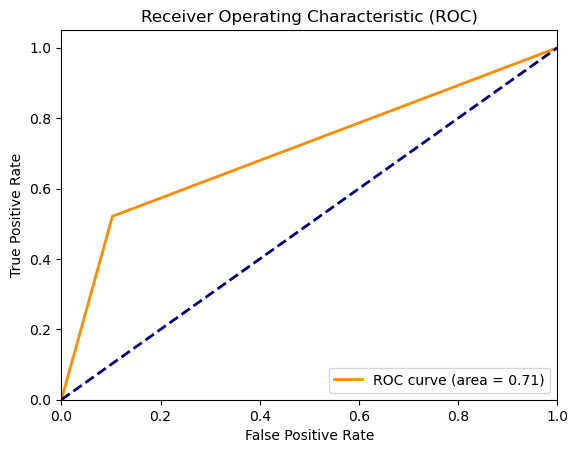

In [150]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr,threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [151]:
rf = RandomForestClassifier(class_weight={0:1,1:7})

param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cv = StratifiedKFold(n_splits=5, shuffle=True)

In [152]:
search = RandomizedSearchCV(rf, param_distributions=param_grid, cv=cv, n_jobs=-1, verbose=1,
                            n_iter=50,error_score='raise',random_state=42)

In [153]:
search.fit(X_train,y_train)

C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   error_score='raise',
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 7}),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=1)

In [129]:
search.best_estimator_

RandomForestClassifier(min_impurity_decrease=6.842136842105264,
                       min_samples_split=83, n_estimators=458, n_jobs=-1)

In [130]:
y_pred = search.best_estimator_.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2303
           1       0.00      0.00      0.00       497

    accuracy                           0.82      2800
   macro avg       0.41      0.50      0.45      2800
weighted avg       0.68      0.82      0.74      2800



C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
confusion_matrix(y_test,y_pred)

array([[2303,    0],
       [ 497,    0]], dtype=int64)

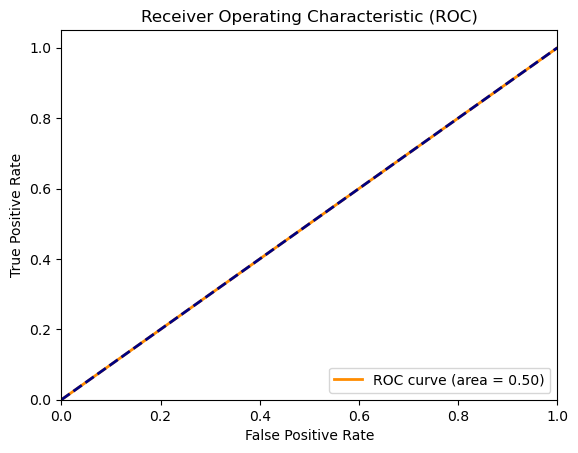

In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr,threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting

In [134]:
parameters = {
    'learning_rate' : np.linspace(0,1,10),
    'n_estimators': np.arange(100,500),
    'min_samples_split' : np.linspace(2,1000,50,dtype=int),
    'max_features' : ['sqrt','log2',None],
    'min_impurity_decrease' : np.linspace(10,0.0001,20)
    }

cv = StratifiedKFold(n_splits=5, shuffle=True)

search = RandomizedSearchCV(XGBClassifier(n_jobs=-1), param_distributions=parameters, cv=cv, n_jobs=-1, verbose=1,
                            n_iter=50,error_score='raise',random_state=42)

In [135]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:personal_card_2: object, personal_card_4: object, campaign_use: object, card_expired: object, score_4: object